EDA For Credit Card Dataset
  

Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score


DATA LOAD

In [3]:
df = pd.read_csv("/Users/kartikaybhardwaj/credit_limit_optimizer/notebook/data/UCI_Credit_Card.csv")


SHAPE OF DATASET

In [10]:
print(f"Shape of dataset is: {df.shape}")

Shape of dataset is: (30000, 25)


In [11]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


RENAMING TARGET VARIABLE

In [4]:
df.rename(columns={"default.payment.next.month": "default"}, inplace=True)

COLUMNS INFORMATION

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

CHECK FOR MISSING VALUES

In [11]:
print(f"Missing values: {df.isnull().sum()}")

Missing values: ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


CHECK FOR DUPLICATED VALUES

In [14]:
df.duplicated().sum()

np.int64(0)

TARGET VARIABLE ANALYSIS

In [15]:
df["default"].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [17]:
df["default"].value_counts(normalize=True) * 100

default
0    77.88
1    22.12
Name: proportion, dtype: float64

INTERPRETATION
- 78% customers paid their credit card bill next month
- 22% customers failed to pay

PLOT

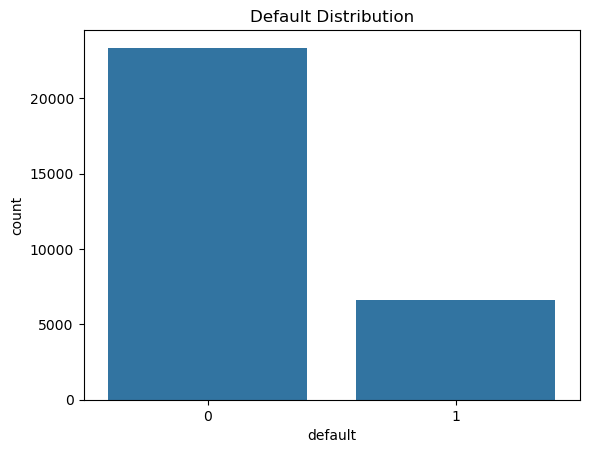

In [16]:
sns.countplot(x="default", data=df)
plt.title("Default Distribution")
plt.show()

 CREDIT LIMIT DISTRIBUTION

In [21]:
print(f" {df["LIMIT_BAL"].describe()}\n")
print("minimun limit balance is 10K")
print("Maximum given is 10L")
print("Average given is 1.6L")

 count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

minimun limit balance is 10K
Maximum given is 10L
Average given is 1.6L


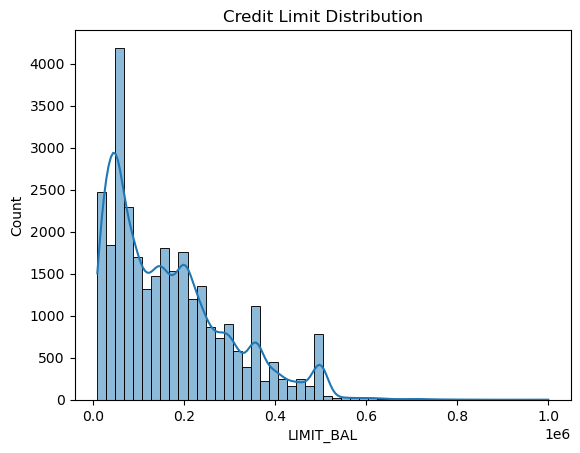

we can see that from 0 To 2 Lakhs this limit balance given to many customers


In [23]:
sns.histplot(df["LIMIT_BAL"], bins=50, kde=True)
plt.title("Credit Limit Distribution")
plt.show()
print("we can see that from 0 To 2 Lakhs this limit balance given to many customers")

CREDIT LIMIT VS DEFAULTERS

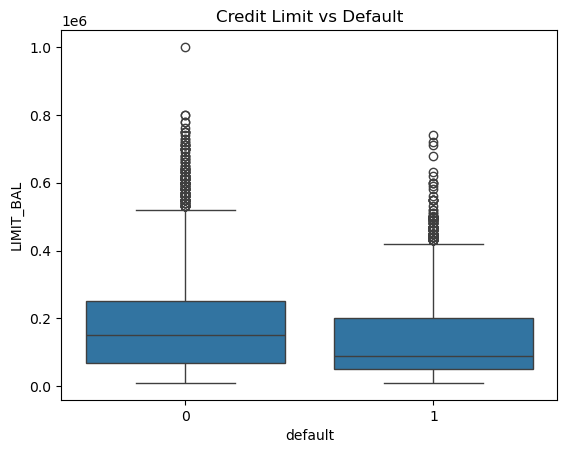

Deafulters(1) have lower credit limit balance


In [25]:
sns.boxplot(x="default", y="LIMIT_BAL", data=df)
plt.title("Credit Limit vs Default")
plt.show()
print("Deafulters(1) have lower credit limit balance")

DEMOGRAPHICS VS DEFAULTERS

GENDER

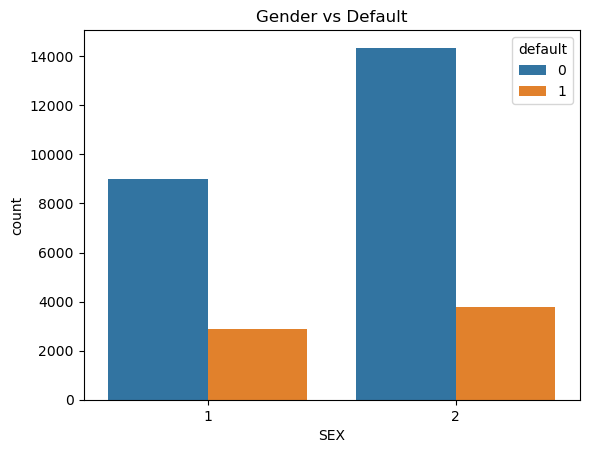

In [26]:
sns.countplot(x="SEX", hue="default", data=df)
plt.title("Gender vs Default")
plt.show()

EDUCATIONS

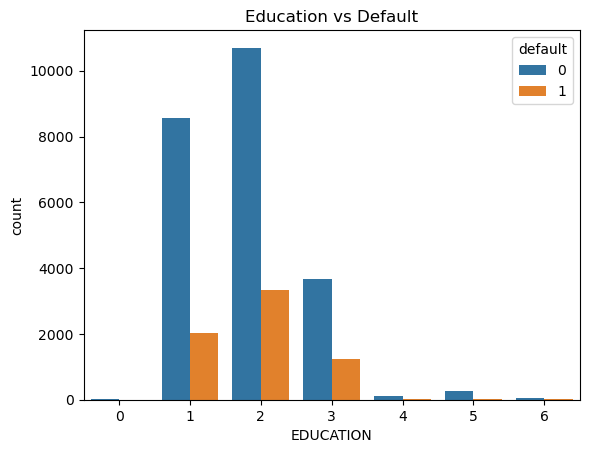

In [27]:
sns.countplot(x="EDUCATION", hue="default", data=df)
plt.title("Education vs Default")
plt.show()

REPAYMENT STATUS ANALYSIS 

In [28]:
pay_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
df["avg_payment_delay"] = df[pay_cols].mean(axis=1)

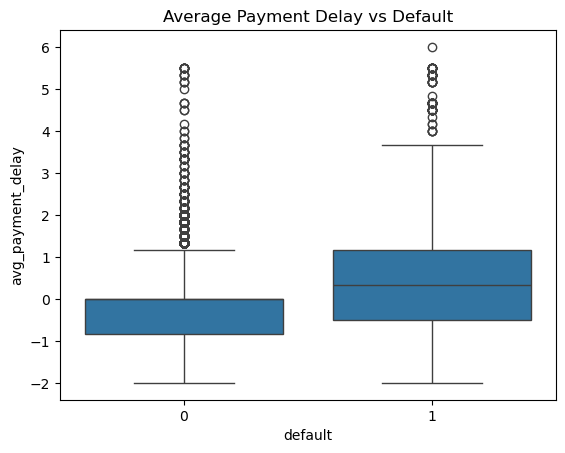

Higher payment delays shows strongly high defaulter risk


In [30]:
sns.boxplot(x="default", y="avg_payment_delay", data=df)
plt.title("Average Payment Delay vs Default")
plt.show()
print("Higher payment delays shows strongly high defaulter risk")

CORRELATION ANAYLIS

In [36]:
corr = df[["LIMIT_BAL", "avg_payment_delay", "default"]].corr()

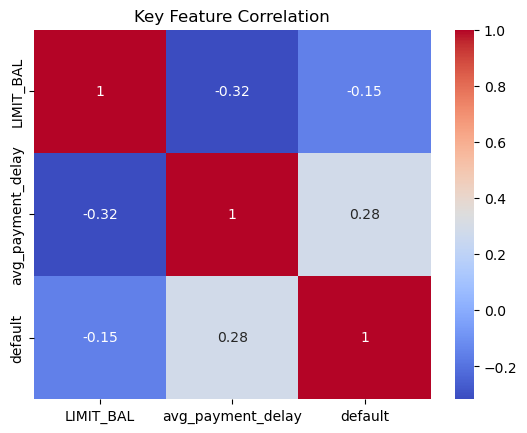

payment behaviour correlated with defaulter like payment delays with defaulters 


In [37]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Key Feature Correlation")
plt.show()
print("payment behaviour correlated with defaulter like payment delays with defaulters ")

FEATURE ENGINEERING

In [5]:
# avg column of repayment because to look average repayment
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
bill_cols = ["BILL_AMT1","BILL_AMT2","BILL_AMT3",
             "BILL_AMT4","BILL_AMT5","BILL_AMT6"]
df["avg_payment_delay"] = df[pay_cols].mean(axis=1)

#freauency of delays lead to risk
df["num_delayed_months"] = (df[pay_cols] > 0).sum(axis=1)

#Average bill amount higher average higer risk
df["avg_bill_amount"] = df[bill_cols].mean(axis=1)

#credit utilization, using too much leads to risk of default
df["credit_utilization"] = df["avg_bill_amount"] / (df["LIMIT_BAL"] +1)




In [6]:
selected_features = [
    "LIMIT_BAL",
    "AGE",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "avg_payment_delay",
    "num_delayed_months",
    "avg_bill_amount",
    "credit_utilization"
]
X = df[selected_features]
y = df["default"]

In [7]:
print("here 1 for male 2 for female")

here 1 for male 2 for female


In [8]:
X.head()

,LIMIT_BAL,AGE,SEX,EDUCATION,MARRIAGE,avg_payment_delay,num_delayed_months,avg_bill_amount,credit_utilization
0,20000.0,24,2,2,1,-0.333333,2,1284.000000,0.064197
1,120000.0,26,2,2,2,0.500000,2,2846.166667,0.023718
2,90000.0,34,2,2,2,0.000000,0,16942.166667,0.188244
3,50000.0,37,2,2,1,0.000000,0,38555.666667,0.771098
4,50000.0,57,1,2,1,-0.333333,0,18223.166667,0.364456


DATA PREPROCESSING

TRAIN TEST SPLIT

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

SEPERATE NUM AND CAT FEATURES

In [19]:
num_features = [
    "LIMIT_BAL",
    "AGE",
    "avg_payment_delay",
    "num_delayed_months",
    "avg_bill_amount",
    "credit_utilization"
]

cat_features = ["SEX", "EDUCATION", "MARRIAGE"]

PREPROCESSING (ENCODING + SCALING)

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(drop="first"), cat_features)
    ]
)

MODEL TRAINING PIPELINE

In [21]:
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000, class_weight="balanced", random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        class_weight="balanced", random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, class_weight="balanced", random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42)
}

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 22788 to 27126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           24000 non-null  float64
 1   AGE                 24000 non-null  int64  
 2   SEX                 24000 non-null  int64  
 3   EDUCATION           24000 non-null  int64  
 4   MARRIAGE            24000 non-null  int64  
 5   avg_payment_delay   24000 non-null  float64
 6   num_delayed_months  24000 non-null  int64  
 7   avg_bill_amount     24000 non-null  float64
 8   credit_utilization  24000 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 1.8 MB


BUILD PIPELINE TRAIN EVALUATE

In [26]:
results = []
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    results.append({
        "Model": name,
        "ROC_AUC": roc_auc
    })

In [25]:
y_prob,y_test

(array([0.41951475, 0.44282443, 0.41174904, ..., 0.31557589, 0.38949153,
        0.38826456]),
 6907     0
 24575    0
 26766    0
 2156     1
 3179     0
         ..
 8836     0
 1259     0
 27309    0
 29583    0
 24399    0
 Name: default, Length: 6000, dtype: int64)

COMPARING ALL MODELS

In [27]:
results_df = pd.DataFrame(results).sort_values(
    by="ROC_AUC", ascending=False
)

results_df

,Model,ROC_AUC
3,Gradient Boosting,0.765951
0,Logistic Regression,0.738694
2,Random Forest,0.733705
6,SVM,0.731840
4,Naive Bayes,0.700524
5,KNN,0.690702
1,Decision Tree,0.583196
